In [49]:
import os
import json
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [50]:
_root = "/media/mountHDD3/data_storage/z2h/VGPhraseCut_v0"
print(os.listdir(_root))

['name_att_rel_count.json', 'refer_input_miniv.json', 'images', 'refer_miniv.json', 'image_data_split.json']


In [51]:
name_att_rel_count = json.load(open(_root + "/name_att_rel_count.json", "r"))
refer_input_miniv = json.load(open(_root + "/refer_input_miniv.json", "r"))
refer_miniv = json.load(open(_root + "/refer_miniv.json", "r"))
image_data_split = json.load(open(_root + "/image_data_split.json", "r"))

In [64]:
name_att_rel_count

{'cat': [['man', 9704],
  ['sky', 8502],
  ['wall', 7283],
  ['building', 6505],
  ['shirt', 6126],
  ['tree', 5884],
  ['grass', 4829],
  ['woman', 4718],
  ['person', 4209],
  ['ground', 4102],
  ['trees', 3869],
  ['window', 3720],
  ['water', 3605],
  ['table', 3522],
  ['sign', 3252],
  ['head', 2917],
  ['fence', 2766],
  ['floor', 2752],
  ['pole', 2716],
  ['road', 2685],
  ['hair', 2649],
  ['pants', 2516],
  ['people', 2504],
  ['car', 2353],
  ['door', 2342],
  ['shadow', 2341],
  ['street', 2247],
  ['clouds', 2209],
  ['sidewalk', 2089],
  ['plate', 1985],
  ['chair', 1895],
  ['jacket', 1888],
  ['leg', 1727],
  ['field', 1691],
  ['line', 1650],
  ['train', 1644],
  ['leaves', 1604],
  ['boy', 1525],
  ['girl', 1479],
  ['snow', 1442],
  ['hand', 1417],
  ['bus', 1358],
  ['background', 1315],
  ['tail', 1295],
  ['face', 1282],
  ['dog', 1215],
  ['light', 1208],
  ['shorts', 1201],
  ['roof', 1184],
  ['arm', 1136],
  ['cloud', 1132],
  ['cat', 1114],
  ['windows', 110

In [63]:
refer_input_miniv

[{'phrase_structure': {'attributes': ['red'],
   'name': 'truck',
   'relation_descriptions': []},
  'task_id': '4744__1656776',
  'image_id': 4744,
  'phrase': 'red truck'},
 {'phrase_structure': {'attributes': ['blue'],
   'name': 'sky',
   'relation_descriptions': []},
  'task_id': '4744__1656762',
  'image_id': 4744,
  'phrase': 'blue sky'},
 {'phrase_structure': {'attributes': [],
   'name': 'door',
   'relation_descriptions': []},
  'task_id': '4744__1656773',
  'image_id': 4744,
  'phrase': 'door'},
 {'phrase_structure': {'attributes': ['black'],
   'name': 'tire',
   'relation_descriptions': []},
  'task_id': '4744__1656775',
  'image_id': 4744,
  'phrase': 'black tire'},
 {'phrase_structure': {'attributes': [],
   'name': 'house',
   'relation_descriptions': []},
  'task_id': '4744__1656769',
  'image_id': 4744,
  'phrase': 'house'},
 {'phrase_structure': {'attributes': [],
   'name': 'window',
   'relation_descriptions': [['has a', 'frame']]},
  'task_id': '4744__1656782',
  

In [53]:
print(type(name_att_rel_count))
print(type(name_att_rel_count['cat']))
print(type(name_att_rel_count['att']))
print(type(name_att_rel_count['rel']))

<class 'dict'>
<class 'list'>
<class 'list'>
<class 'list'>


In [54]:
def convert_to_dict(item):
    if isinstance(item, list):
        return dict(item)
    return item

cats = convert_to_dict(name_att_rel_count['cat'])
atts = convert_to_dict(name_att_rel_count['att'])
rels = convert_to_dict(name_att_rel_count['rel'])

n_s = sorted([kv for kv in cats.items()], key=lambda kv: -kv[1])
a_s = sorted([kv for kv in atts.items()], key=lambda kv: -kv[1])
r_s = sorted([kv for kv in rels.items()], key=lambda kv: -kv[1])

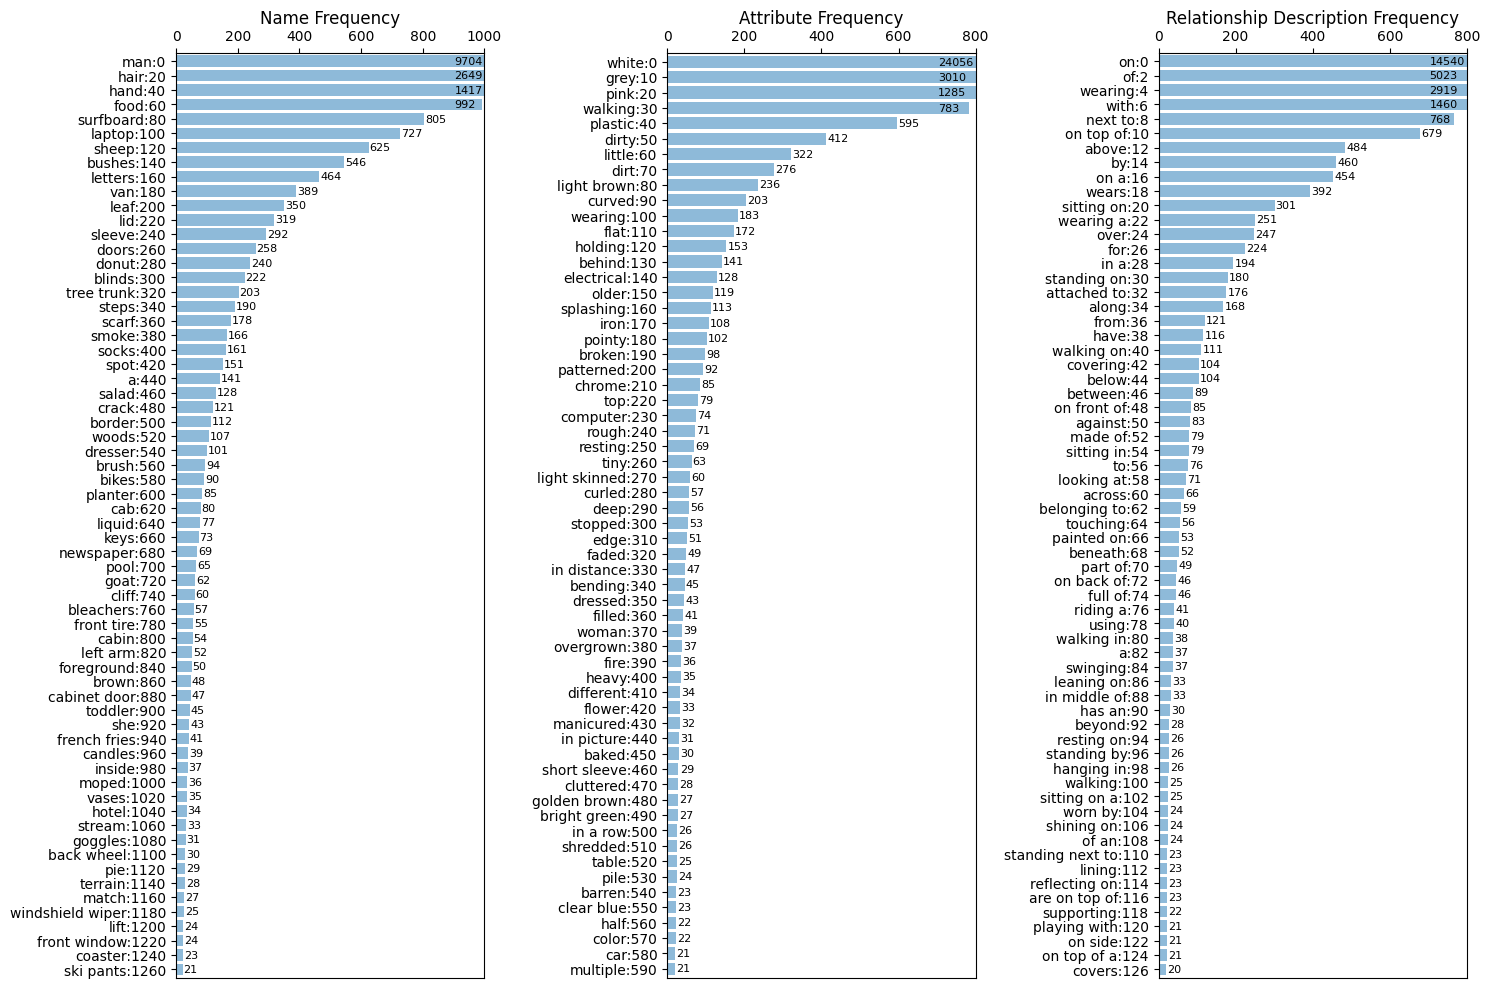

In [60]:
fig, axs = plt.subplots(1,3, figsize=[15, 10])

def autolabel(rects, ax, max_h):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        h = rect.get_width()
        height = min(rect.get_width(), max_h - 100)
        ax.text(height +3, rect.get_y() + rect.get_height()/2., 
                '%d' % int(h),
                ha='left', va='center',fontsize=8)

end = 1272
gap = 20
n = n_s[0: end+1: gap]
nl = ['%s:%d' % (a[0], i * gap) for i, a in enumerate(n)]
nc = [a[1] for a in n]        
        
rects = axs[0].barh(np.arange(len(nl)), nc, alpha=0.5)
autolabel(rects, axs[0], 1000)
axs[0].set_yticks(np.arange(len(nl)))
axs[0].set_yticklabels(nl,horizontalalignment='right')
axs[0].set_xlabel('Name Frequency', fontsize=12)
# axs[0].set_title('Name Frequency')
axs[0].set_xlim([0,1000])
axs[0].set_ylim([-0.6,len(nl)-0.4])
axs[0].invert_yaxis()
axs[0].xaxis.tick_top()
axs[0].xaxis.set_label_position('top')

end = 593
gap = 10
n = a_s[0: end+1: gap]
nl = ['%s:%d' % (a[0], i * gap) for i, a in enumerate(n)]
nc = [a[1] for a in n]        
        
rects = axs[1].barh(np.arange(len(nl)), nc, alpha=0.5)
autolabel(rects, axs[1], 800)
axs[1].set_yticks(np.arange(len(nl)))
axs[1].set_yticklabels(nl, horizontalalignment='right')
axs[1].set_xlabel('Attribute Frequency', fontsize=12)
# axs[1].set_title('Attribute Frequency')
axs[1].set_xlim([0,800])
axs[1].set_ylim([-0.6,len(nl)-0.4])
axs[1].invert_yaxis()
axs[1].xaxis.tick_top()
axs[1].xaxis.set_label_position('top')


end = 126
gap = 2
n = r_s[0: end+1: gap]
nl = ['%s:%d' % (a[0], i * gap) for i, a in enumerate(n)]
nc = [a[1] for a in n]        
        
rects = axs[2].barh(np.arange(len(nl)), nc, alpha=0.5)
autolabel(rects, axs[2], 800)
axs[2].set_yticks(np.arange(len(nl)))
axs[2].set_yticklabels(nl, horizontalalignment='right')
axs[2].set_xlabel('Relationship Description Frequency', fontsize=12)
# axs[2].set_title('Relationship Description Frequency')
axs[2].set_xlim([0,800])
axs[2].set_ylim([-0.6,len(nl)-0.4])
axs[2].invert_yaxis()
axs[2].xaxis.tick_top()
axs[2].xaxis.set_label_position('top')


fig.tight_layout() 
plt.show()